<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/Semana_7_Notebook2_A01793546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

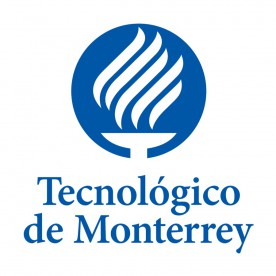


#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Dr. María de la Paz Rico Fernández


## **Adtividad de la Semana 7 Notebook 2**
###**Actividad Semanal -- 7 K means**



Encuentra el numero ideal de almacenes, justifica tu respuesta:

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

In [2]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 8.4 MB/s 
     |████████████████████████████████| 1.0 MB 69.2 MB/s 
     |████████████████████████████████| 1.7 MB 52.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 83.7 MB/s 
     |████████████████████████████████| 6.3 MB 56.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=ed4d105e8c19e6e0638e77f863709c00bfdfcd7150a4dde2461c2d514a23cc7e
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=05dc3eba28128241c7f1bec124a2b5b42536faaf37f14f6c0426873ad369319b
  Stored in directory: /root/.

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [6]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [7]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [9]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

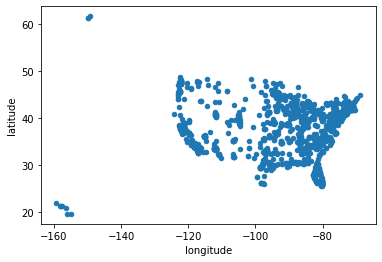

In [10]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [11]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [13]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [14]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [15]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [16]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

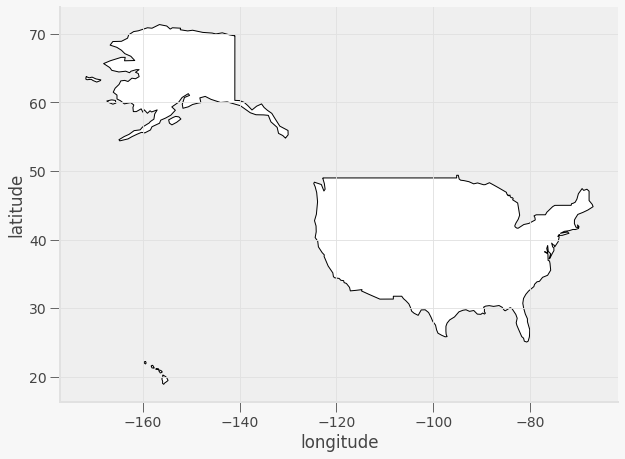

In [17]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

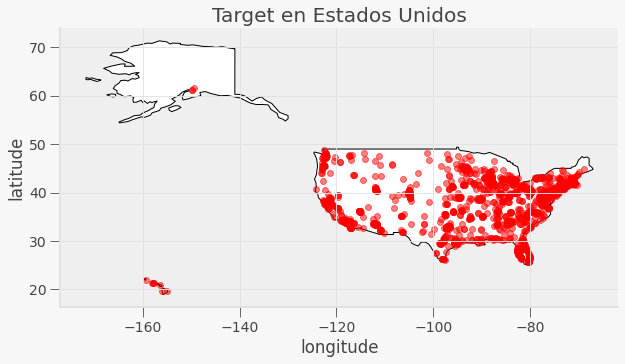

In [18]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)



¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

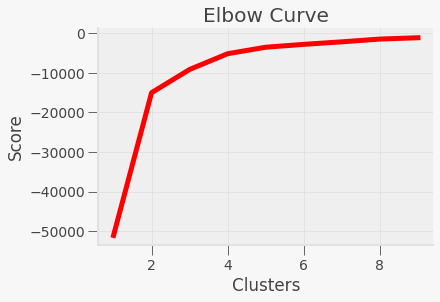

In [60]:
from sklearn.cluster import KMeans

#Quie es un cluster? es una agrupacion de elementos, en este caso de los puntos que representan las tiendas, para este caso podemos visualizar una clusterizacion como una region.
#Asi como lo ven lo escribi mientras que rigo explicaba, soy buen mecanografo.
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters] #Aqui vamos evaluadno el kmeans en un numero de clusters, para ver cual es el mejor
#Cada cluster, para terminos del ejercicio, sera un almacen estimado, para un grupo de tiendas kmean
Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] #Evalua tus componentes minimos, 
#El score es la suma de las distancias del centroide a sus "k" vecinos más cercanos, entre menos vecinos el valor es más grande y es negativa

# Visualize
plt.plot(K_clusters, score,'r-', linewidth=5)
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#Em el codo se ve que el 3 es lo mas mejor, porque a partir de ahi ya empieza a sobre entrenarse haciendo un kmean para cada tienda, y no teniendo una agrupacion de tiendas cercanas 
#Los vaores en y son las latitudes, la companera elmy esta con mucho trabajo, y no ha leido, ahi se los dejo para que le reclamen despues, 
#El metodo elbow curve, nos permite ver la candida de tiendas que necesitamos
#Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
#https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml#:~:text=The%20elbow%20method%20is%20used,by%20different%20values%20of%20k.


PCA es para reducir dimensiones, la variabilidad de tus datos, para trabajar con menos variables de entrada y KMeans es para hacer clusteres, aqui solo los agrupas y la variabilidad no nos importa

In [20]:
kmeans = KMeans(n_clusters = 3, init ='k-means++') #Aqui no creamos nuevos clusters, solamente re creamos 3, que son los que necesitamos
# clusterizamos, entreanndo el kmeans 
kmeans.fit(latlong[latlong.columns[0:2]])
# ahora guardamos los resultados
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

In [21]:
X = df[["longitude","latitude"]]

kmeans = KMeans(n_clusters=3).fit(X) 
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C) 
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C


,0,1,Coordinates
0,-93.327172,37.980063,POINT (-93.32717 37.98006)
1,-78.569908,37.789554,POINT (-78.56991 37.78955)
2,-118.624473,37.487342,POINT (-118.62447 37.48734)


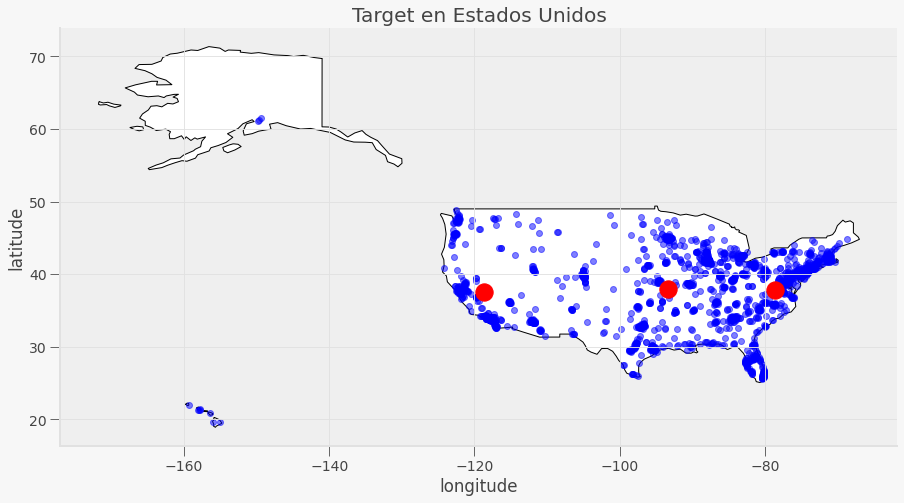

In [54]:
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


gdf.plot(ax=gax, color='blue', alpha = 0.5)
gdf_C.plot(ax=gax, color='red', alpha = 1, markersize = 300)

#De aqui para abajo es puro ploting busines
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [23]:
from pandas.core.internals.concat import concat_arrays

Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0]) 
print(Location1)
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
print(Location2)
Location3 = str(gdf_C[1][2]) + ", " + str(gdf_C[0][2])
print(Location3)

37.98006260590112, -93.32717230430622
37.789554004474006, -78.56990807484885
37.48734203064935, -118.62447331844157


In [24]:
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my-application")
Locations = [Location1, Location2, Location3]

for i in Locations:
  location = geolocator.reverse(i) 
  print('almacen en ---', location.address)

almacen en --- Hickory County, Missouri, United States
almacen en --- Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
almacen en --- Paradise Estates, Mono County, California, United States


In [52]:
distancia1 = float(str(geodesic(Location1, Location2).miles))
distancia2 = float(str(geodesic(Location2, Location3).miles))
print("Distancia entre el primer y segundo almacén : ", round(distancia1,2), " miles.") 
print("Distancia : ",round(distancia1/1.6,2)," Kms.")
print("Distancia entre el segundo y tercer almacén : ", round(distancia2,2), " miles.")
print("Distancia : ",round(distancia2/1.6,2)," Kms.")

Distancia entre el primer y segundo almacén :  805.92  miles.
Distancia :  503.7  Kms.
Distancia entre el segundo y tercer almacén :  2179.65  miles.
Distancia :  1362.28  Kms.


**Conclusiones:**

*Si es de vital importancia poder visualizar la información con algo que nos genere "sentido" como en este caso un mapa ya que nos permite poder plasmar y simplificar el mensaje que deseamos transmitir respecto a el objetivo que deseamos establecer. en este caso podemos ver que no solo estamos identificando nuestras tiendas sino que podemos conocer la ubicación con su respectiva distancia y con ello dejar mucho mas claro el mensaje, con esto me surgen diferentes dudas al respecto del alcance de esta herramienta y de la biblioteca, si bien es la primera vez que veo como se puede emplear esta herramienta, si considero que podría ser traspolable para mi caso, en una planta, previamente definiendo un "Mapa de las instalaciones de la planta"?, acaso podría poner la acumulacion de fallas de los equipos e ir haciendo un mapa de calor de dicha información, esta sería una herramienta increiblemente util ya que podríamos visualizar la concentracion de los equipos que estan fallando y de aqui poder partir nuestros respectivos analisis con los que podemos hacer sus predicciones de fallas a partir de la acumulación de eventos historicos y con los datos que tenemos de diferentes sub sistemas que nos brindan información como lo son los sistemas de monitoreo de vibraciones, corrientes, ultrasonido y nuestro sistema con el que se monitorean los robots, en mi caso, me queda la tarea de poder emplear esta herramienta para poder ir manejandola con eficiencia y sobre todo ir practicando el conocimiento empleado para poder realizar una implementación visual de la información de tal manera que estos datos no solo informen sino que de una manera facil, practica y eficiente cumplan su objetivo sin tanta explicación, como podría decir: que los datos hablen por si solos*